# Predicting Film Genres: Exploring Machine Learning Models in Cinema Classification


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('movie train test.csv')

In [3]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [4]:
df.shape

(22579, 3)

In [5]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


## Visualizing the count of 'genre' column from the dataset

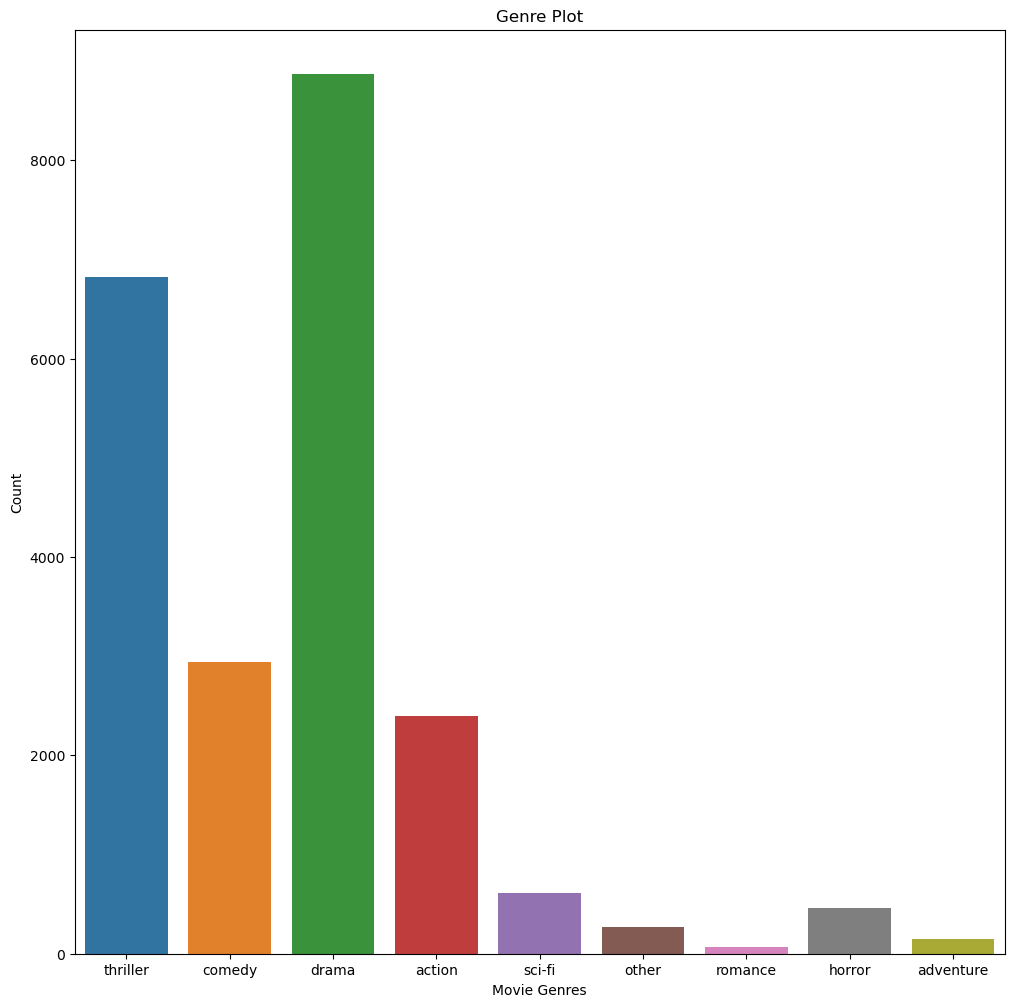

In [6]:
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

# Data Cleaning and Preprocessing

In [7]:
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

## Mapping the genres to values

In [8]:
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 
                'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [9]:
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [10]:
df.drop('id', axis=1, inplace=True)

## Cleaning the text

In [11]:
corpus = []
ps = PorterStemmer()
for i in range(0, df.shape[0]):
    dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])
    dialog = dialog.lower() 
    words = dialog.split() 
    dialog_words = [word for word in words if word not in set(stopwords.words('english'))]
    words = [ps.stem(word) for word in dialog_words]
    dialog = ' '.join(words)
    corpus.append(dialog)

In [12]:
len(corpus)

22579

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
y = df['genre'].values
y.shape

(22579,)

In [17]:
X.shape

(22579, 10000)

## Model Building

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [27]:
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


# Predicting Movie Genres using different Models

# Naive Bayes Classifier

## Fitting Naive Bayes to the Training set

In [28]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

## Predicting the Test set results

In [29]:
nb_y_pred = nb_classifier.predict(X_test)
nb_y_pred

array([1, 4, 1, ..., 8, 4, 8], dtype=int64)

# Evaluation Metrics

## Calculating Accuracy

In [30]:
nb_classifier.score(X_test,y_test)

0.895704162976085

## F1 Score

In [39]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, nb_y_pred,average='macro')
print("F1 score:", f1)

F1 score: 0.8840282199396181


## Precision

In [41]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, nb_y_pred,average='macro')
print("Precision:", precision)

Precision: 0.8693085031263831


## Evaluating with Confusion Matrix

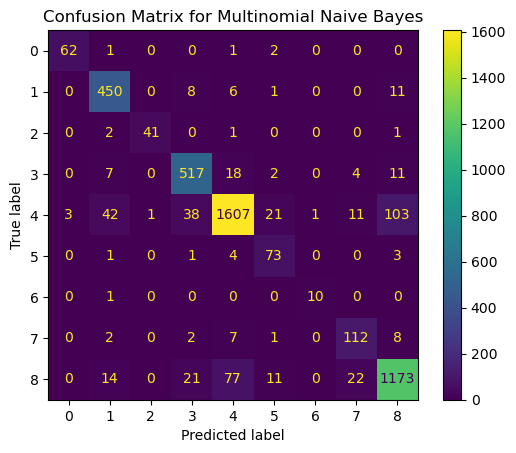

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute confusion matrix
cm = confusion_matrix(y_test, nb_y_pred)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_classifier.classes_)
disp.plot()
plt.title("Confusion Matrix for Multinomial Naive Bayes")
plt.show()

# Random Forest Classifier

## Fitting Random Forest Classifier to the training set

In [50]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
y_pred=clf.predict(X_test)
y_pred

array([4, 4, 1, ..., 8, 4, 4], dtype=int64)

# Evaluation Metrics 

## Accuracy

In [52]:
clf.score(X_test,y_test)

0.7581930912311781

## Precision

In [57]:
precision = precision_score(y_test, y_pred,average="macro")
print("Precision:", precision)

Precision: 0.9261276972989061


## F1 Score

In [58]:
f1 = f1_score(y_test, y_pred,average="macro")
print("F1 score:", f1)

F1 score: 0.6890953414807666


## Confusion Matrix

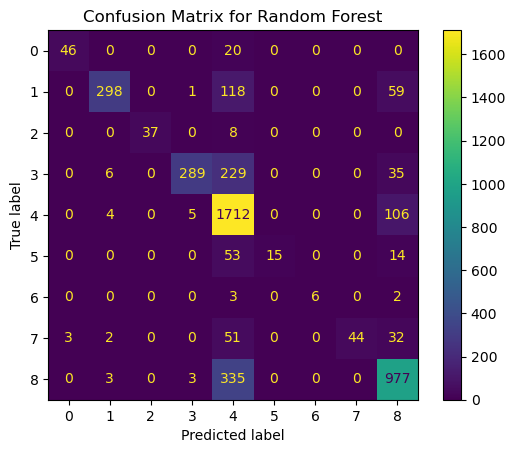

In [59]:
cm = confusion_matrix(y_test, y_pred)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()                                                                                                                                                                                                                                                                                                                                              
plt.title("Confusion Matrix for Random Forest")
plt.show()

# Linear SVM Classifier

## Now Fitting Linear SVM to the training set

In [60]:
from sklearn.svm import SVC #  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train,y_train) 

SVC(kernel='linear', random_state=0)

# Evaluation Metrics

## Accuracy

In [61]:
classifier.score(X_test,y_test)

0.9045615589016829

## Precision

In [62]:
y_pred=classifier.predict(X_test)
precision = precision_score(y_test, y_pred,average="macro")
print("Precision:", precision)

Precision: 0.9417177769425188


## F1 Score

In [63]:
f1 = f1_score(y_test, y_pred,average="macro")
print("F1 score:", f1)

F1 score: 0.8963041991540774


## Confusion Matrix

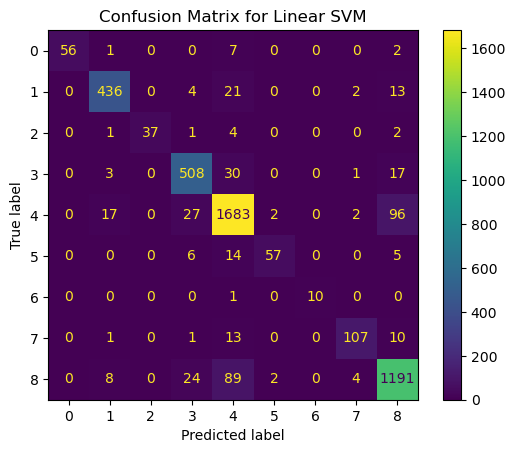

In [64]:
cm = confusion_matrix(y_test, y_pred)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.title("Confusion Matrix for Linear SVM")
plt.show()

# Logistic Regression 

## Fitting Logistic Regression to the training set

In [65]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs',max_iter=1000)
model.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

# Evaluation Metrics

## Accuracy

In [66]:
model.score(X_test,y_test)

0.9151904340124003

## Precision

In [67]:
y_pred = model.predict(X_test)
# Compute precision
precision = precision_score(y_test, y_pred,average="macro")
print("Precision:", precision)

Precision: 0.9500248287526897


## F1 Score

In [68]:
f1 = f1_score(y_test, y_pred,average="macro")
print("F1 score:", f1)

F1 score: 0.8953045007383784


## Confusion Matrix

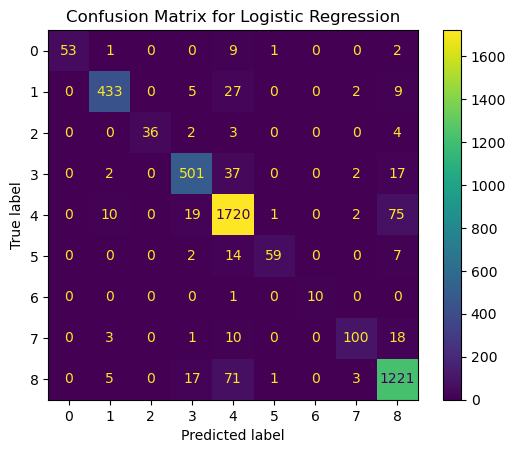

In [69]:
cm = confusion_matrix(y_test, y_pred)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# K-Nearest Neighbors

## Fitting KNN Model to the training set

In [70]:
from sklearn.neighbors import KNeighborsClassifier
k=3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)



KNeighborsClassifier(n_neighbors=3)

# Evaluation Metrics

##  Accuracy 

In [71]:
knn.score(X_test,y_test)

0.8361381753764393

## Precision

In [72]:
y_pred =knn.predict(X_test)
# Compute precision
precision = precision_score(y_test, y_pred,average="macro")
print("Precision:", precision)

Precision: 0.8763431800676921


##  F1 Score

In [73]:
f1 = f1_score(y_test, y_pred,average="macro")
print("F1 score:", f1)

F1 score: 0.8112851718699554


## Confusion Matrix

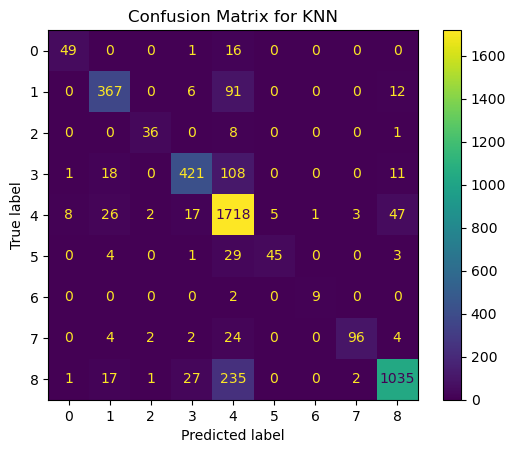

In [74]:
cm = confusion_matrix(y_test, y_pred)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title("Confusion Matrix for KNN")
plt.show()

# AdaBoost Classifier

## Fitting AdaBoost classifier to the training set

In [75]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
ada.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=100)

# Evaluation Metrics

## Accuracy

In [76]:
ada.score(X_test,y_test)

0.42050487156775906

## Precision

In [78]:
y_pred = ada.predict(X_test)
# Compute precision
precision = precision_score(y_test, y_pred,average="macro")
print("Precision:", precision)

Precision: 0.39380072958659595


C:\Users\User\Sample_Project_1\environment1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## F1 Score

In [81]:
f1 = f1_score(y_test, y_pred,average="macro")
print("F1 score:", f1)

F1 score: 0.2887523717247274


## Confusion Matrix

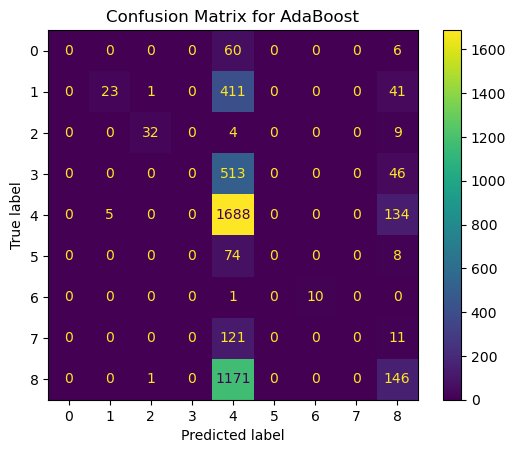

In [82]:
cm = confusion_matrix(y_test, y_pred)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada.classes_)
disp.plot()
plt.title("Confusion Matrix for AdaBoost")
plt.show()

# Predictions

In [83]:
def genre_prediction(sample_script):
    sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
    sample_script = sample_script.lower()
    sample_script_words = sample_script.split()
    sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_script = [ps.stem(word) for word in sample_script_words]
    final_script = ' '.join(final_script)
    temp = cv.transform([final_script]).toarray()
    return nb_classifier.predict(temp)[0]

## Loading test dataset

In [84]:
test = pd.read_csv('Movie test set.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [85]:
test.shape

(5589, 2)

In [86]:
test.drop('id', axis=1, inplace=True)

## Predicting values

In [87]:
from random import randint
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: TTES have embedded in the wall behind him, having torn completely through him. Whistler steps forward. One of the vampire sentries LASHES OUT, striking him in the face with the butt of his rifle. Whistler sinks to his knees, stunned. The guard disarms him. ON BLADE Gritting his teeth against the pain. He reaches inside his combat harness, pulling out the remote detonator for the explosive flechette in Reinhardt's skull. BLADE Kiss your ass goodbye, Reinhardt. SCUD You're wasting your time, Blade. The flechette's a dud. Scud crosses over to Reinhardt's side. Whistler stares at him in disbelief. SCUD CONT'D It was never supposed to explode. All it was supposed to do was make you feel like you were in control. Blade's eyes darken with hatred. Reinhardt laughs. REINHARDT Thought you had me on a short leash, didn't you, chief? Only it turns out, you're the one that's been on the leash. Reinhardt digs his claws into his scalp and tugs the barbed flechette from his skull. As he does s